In [7]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [8]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [9]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [10]:
t = 1000.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [5]:
tr[end]

LoadError: UndefVarError: tr not defined

## Диапазон [-0.09635; -0.097]
## Начальные условия в единственном экземпляре 

In [28]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375

const xthr = 0.9; const ythr = 0.4 # ythr was change

α = 0.0900; U0 = 0.40; ΔU0 = 0.330; I0 =  -0.0965475  # -0.09639 # -0.096532

-0.0965475

In [19]:
0.428537999085547
 0.9869461018719765
 0.4147074686519084

0.4147074686519084

Chaos

I_0 = -0.0965475

u0 = 0.0629179098954805,
 0.9878011165718715,
 0.39348502100476596

In [69]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = tr[end]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.2549157859517734
 0.9478197485340335
 0.35785549988135906

In [185]:
"""
I0 -0.09655 
SA[0.5016565343933567
 0.8843561571148351
 0.3465491964077342

I0 -0.09658
SA[0.17859698043562283
 0.96512249099938
 0.37012169901914443]]
"""

"I0 -0.09655 \nSA[0.5016565343933567\n 0.8843561571148351\n 0.3465491964077342\n\nI0 -0.09658\nSA[0.17859698043562283\n 0.96512249099938\n 0.37012169901914443]]\n"

Cycle

parameters

const τ =  0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375
const xthr = 0.9; const ythr = 0.4 # ythr was change
α = 0.850; U0 = 0.3; ΔU0 = 0.305; I0 = -1.0

u0 [0.6388778225673112, 0.9509649024501307, 0.4624513204009227]

In [70]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.254916, 0.94782, 0.357855]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.09, 0.013, 0.15, 1.8, 3.07, 0.9, …, 0.33, 0.4375, -0.0965475]

In [71]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

In [72]:
tr

3-dimensional Dataset{Float64} with 1000001 points
 0.209726  0.98821   0.411987
 0.216652  0.988159  0.412132
 0.224044  0.988105  0.412276
 0.23194   0.988046  0.412421
 0.240377  0.987982  0.412565
 0.249399  0.987914  0.412709
 0.259049  0.98784   0.412853
 0.269377  0.98776   0.412996
 0.280434  0.987675  0.41314
 0.292276  0.987583  0.413283
 0.304961  0.987484  0.413426
 0.318553  0.987377  0.413569
 0.33312   0.987262  0.413712
 ⋮                   
 0.311148  0.937119  0.35343
 0.309623  0.937412  0.35353
 0.308094  0.937704  0.353631
 0.30656   0.937994  0.353732
 0.305022  0.938284  0.353834
 0.30348   0.938571  0.353936
 0.301933  0.938858  0.354039
 0.300381  0.939143  0.354143
 0.298824  0.939426  0.354246
 0.297263  0.939709  0.35435
 0.295696  0.93999   0.354455
 0.294125  0.940269  0.35456

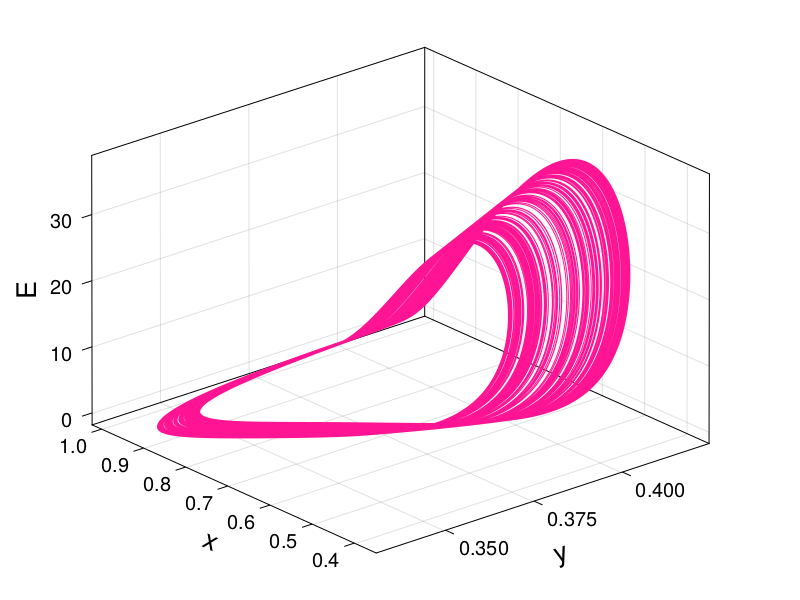

In [73]:
lb_size = 27
tck_size = 20

f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, tr[:, 3], tr[:, 2], tr[:, 1], linewidth = 1.0, color = :deeppink)
f

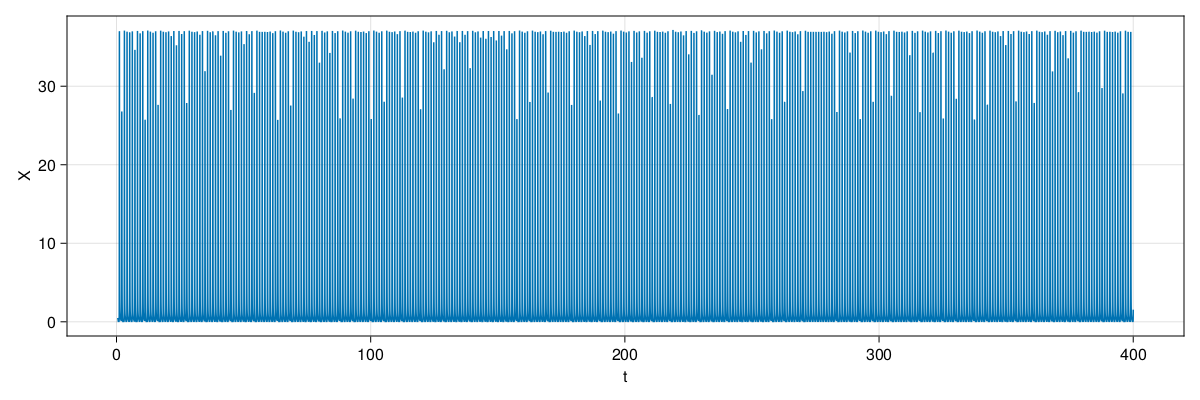

In [74]:
ts, tf = 500, 400000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "X")
lines!(axis, trange[ts:tf], tr[ts:tf, 1])
f

### Chaotic attractor

In [29]:
u0_chaos = SA[0.2549157859517734, 0.9478197485340335, 0.35785549988135906]
p_chaos = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -0.0965475]
ds_chaos = ContinuousDynamicalSystem(TM, u0_chaos, p_chaos);

In [30]:
tr_chaos = trajectory(ds_chaos, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

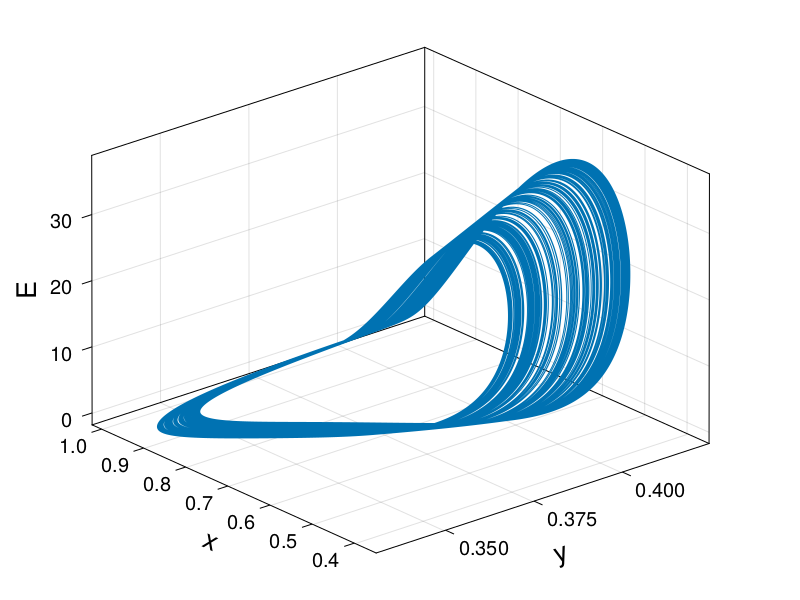

In [31]:
lb_size = 27
tck_size = 20

f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, tr_chaos[:, 3], tr_chaos[:, 2], tr_chaos[:, 1], linewidth = 1.0)
f

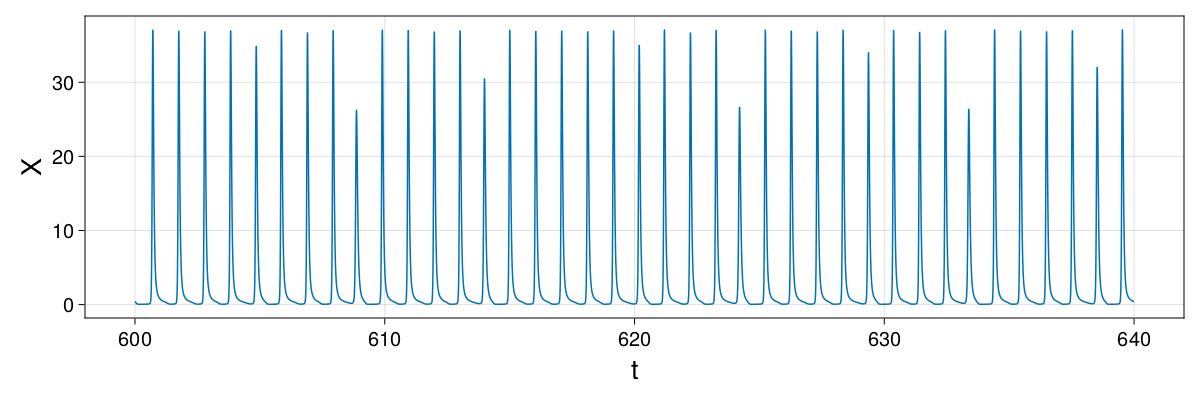

In [32]:
ts, tf = 600000, 640000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)
lines!(axis, trange[ts:tf], tr_chaos[ts:tf, 1])
f

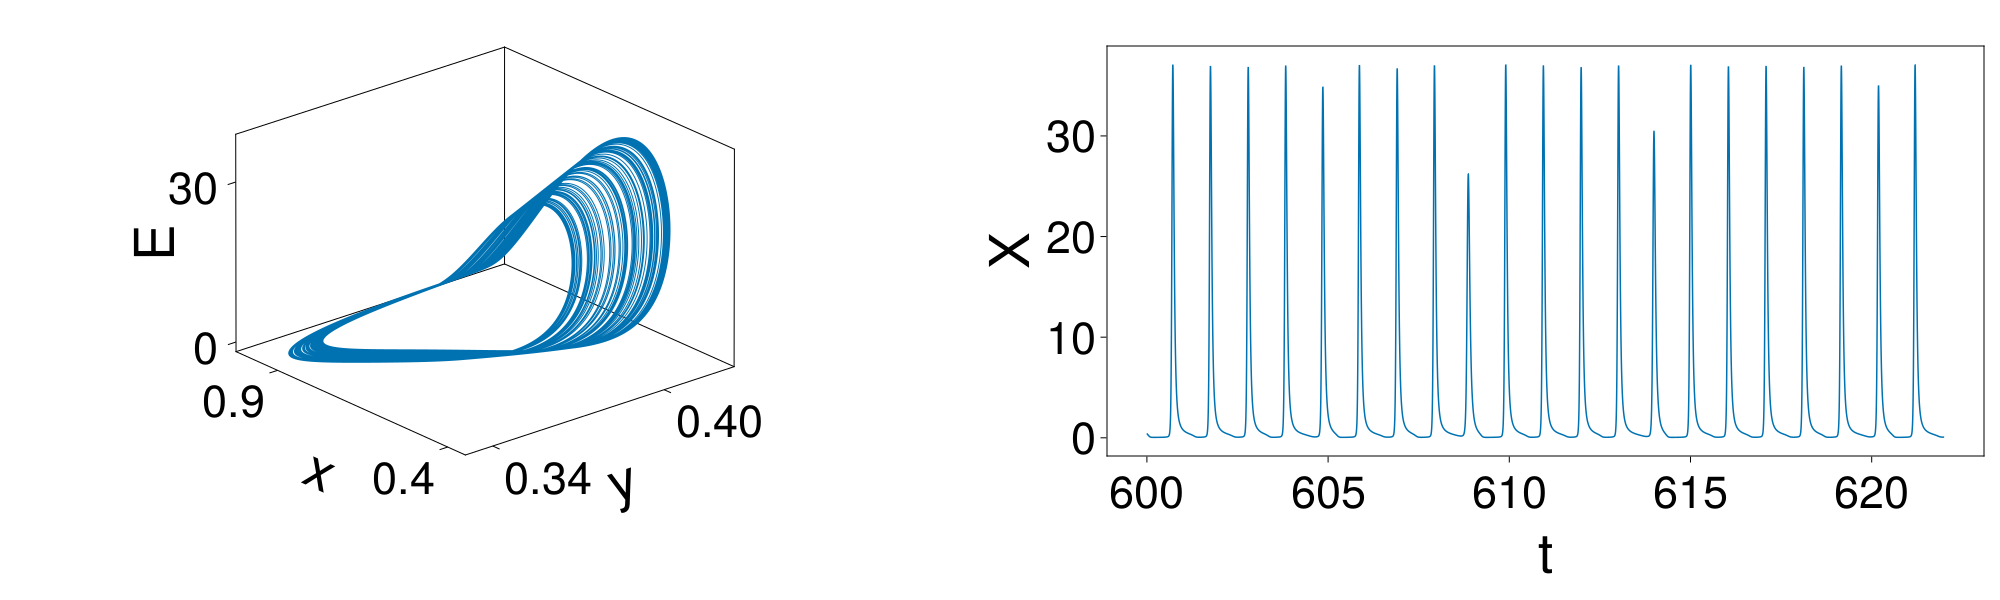

In [63]:
ts, tf = 600000, 622000
ts_p, tf_p = 600000, 1000000
lb_size = 55
tck_size = 45
xticks = [0.4, 0.9]
yticks = [0.34, 0.4]
Eticks = [0.0, 30.0]

f = Figure(resolution = (2000, 600))

axis1 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis2 = Axis(f[1, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)

axis1.yticks = xticks
axis1.xticks = yticks
axis1.zticks = Eticks

axis1.xgridvisible = false; axis1.ygridvisible = false; axis1.zgridvisible = false;
axis2.xgridvisible = false; axis2.ygridvisible = false



lines!(axis1, tr_chaos[ts_p:tf_p, 3], tr_chaos[ts_p:tf_p, 2], tr_chaos[ts_p:tf_p, 1], linewidth = 1.0)
lines!(axis2, trange[ts:tf], tr_chaos[ts:tf, 1])

f

In [64]:
save("chaotic_attractor.eps", f)

CairoMakie.Screen{EPS}


### 4-period cycle

In [34]:
u0_4p_cycle = SA[0.06234611064717397, 0.9879390131945034, 0.3929736749866099]
p_4p_cycles = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, −0.096529]
ds_4p_cycle = ContinuousDynamicalSystem(TM, u0_4p_cycle, p_4p_cycles);

In [35]:
tr_4p_cycle = trajectory(ds_4p_cycle, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

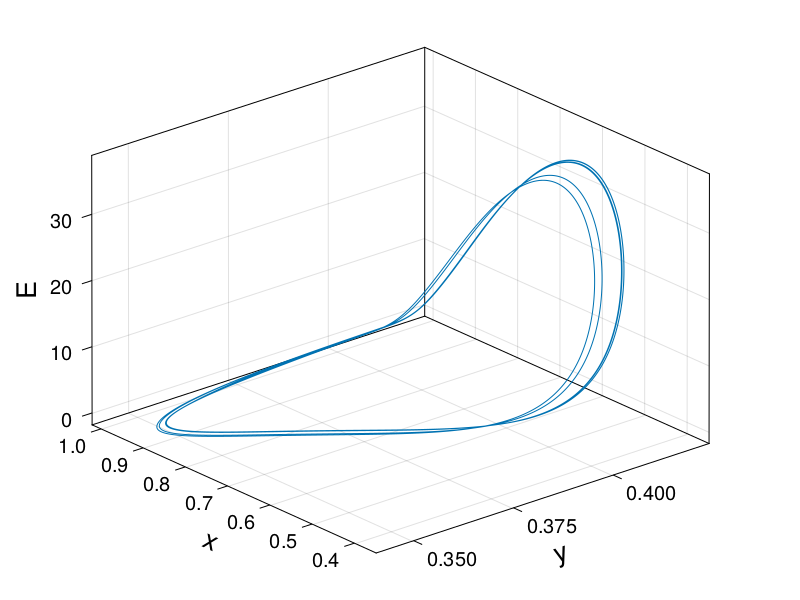

In [36]:
lb_size = 27
tck_size = 20

f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, tr_4p_cycle[:, 3], tr_4p_cycle[:, 2], tr_4p_cycle[:, 1], linewidth = 1.0)
f

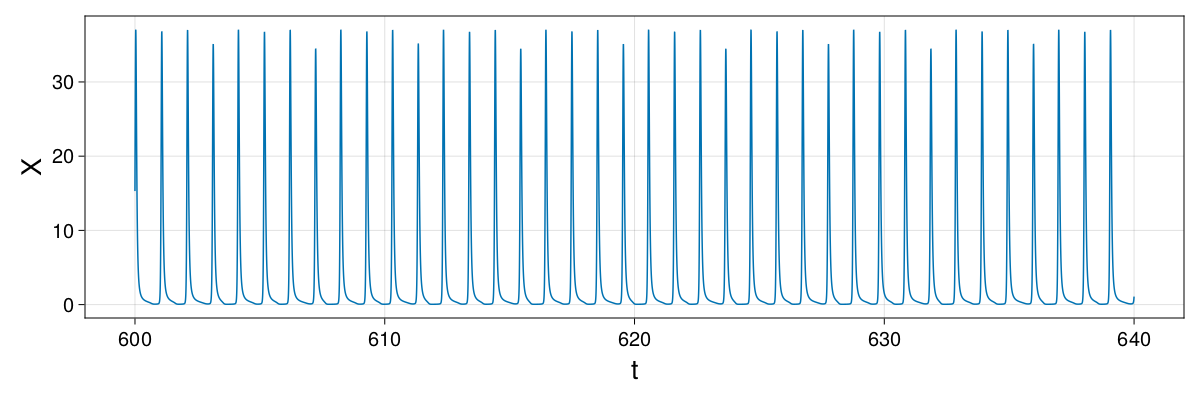

In [37]:
ts, tf = 600000, 640000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)
lines!(axis, trange[ts:tf], tr_4p_cycle[ts:tf, 1])
f

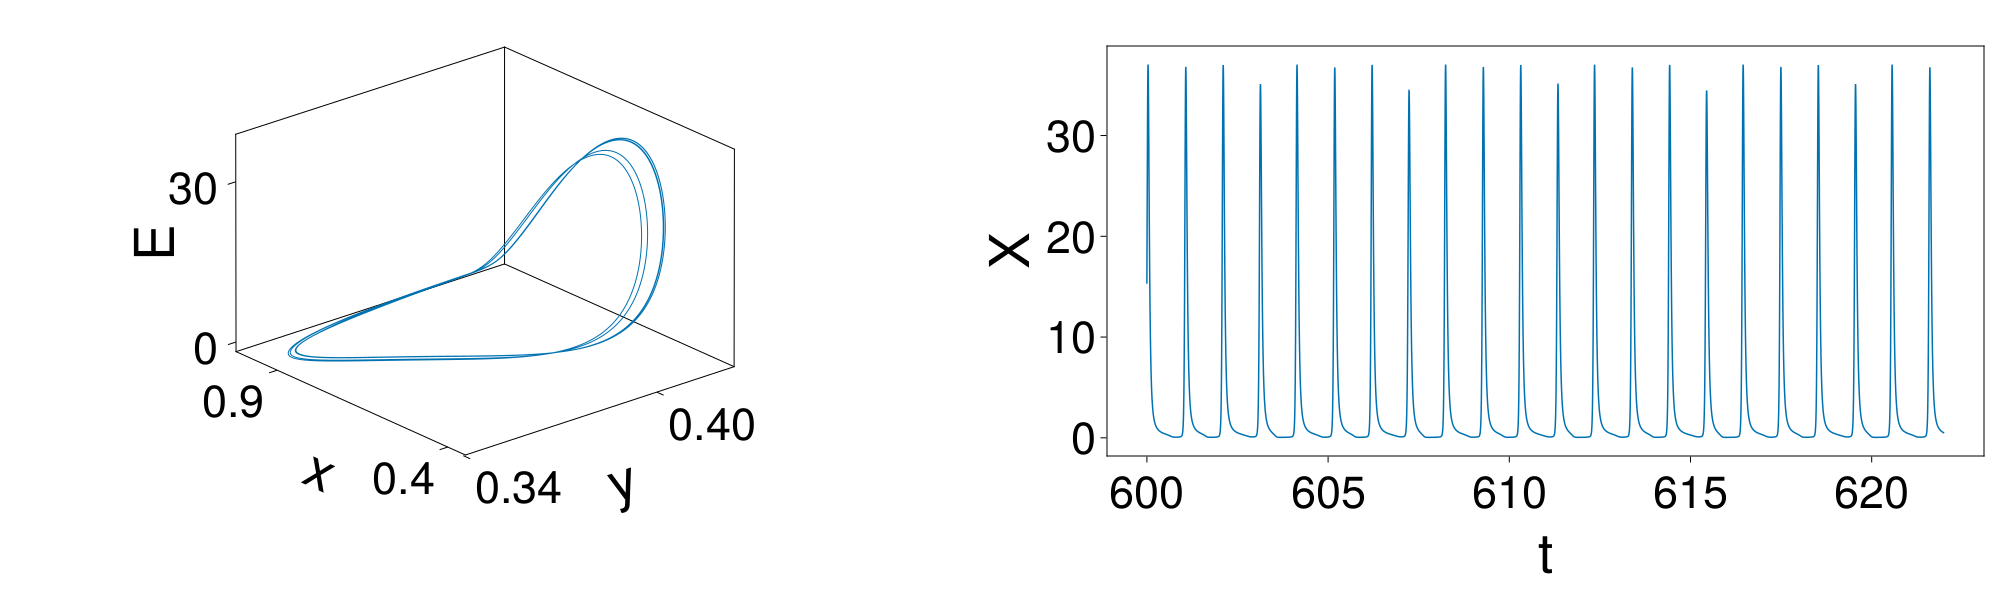

In [65]:
ts, tf = 600000, 622000
ts_p, tf_p = 600000, 622000
lb_size = 55
tck_size = 45
xticks = [0.4, 0.9]
yticks = [0.34, 0.4]
Eticks = [0.0, 30.0]

f = Figure(resolution = (2000, 600))

axis1 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis2 = Axis(f[1, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)

axis1.yticks = xticks
axis1.xticks = yticks
axis1.zticks = Eticks

axis1.xgridvisible = false; axis1.ygridvisible = false; axis1.zgridvisible = false;
axis2.xgridvisible = false; axis2.ygridvisible = false



lines!(axis1, tr_4p_cycle[ts_p:tf_p, 3], tr_4p_cycle[ts_p:tf_p, 2], tr_4p_cycle[ts_p:tf_p, 1], linewidth = 1.0)
lines!(axis2, trange[ts:tf], tr_4p_cycle[ts:tf, 1])

f

In [66]:
save("4-period_cycle.eps", f)

CairoMakie.Screen{EPS}


## 2-period cycle

In [38]:
u0_2p_cycle = SA[1.253563418223435, 0.69736269152086, 0.3684618610490993]
p_2p_cycles = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -0.09650]
ds_2p_cycle = ContinuousDynamicalSystem(TM, u0_2p_cycle, p_2p_cycles);

In [39]:
tr_2p_cycle = trajectory(ds_2p_cycle, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

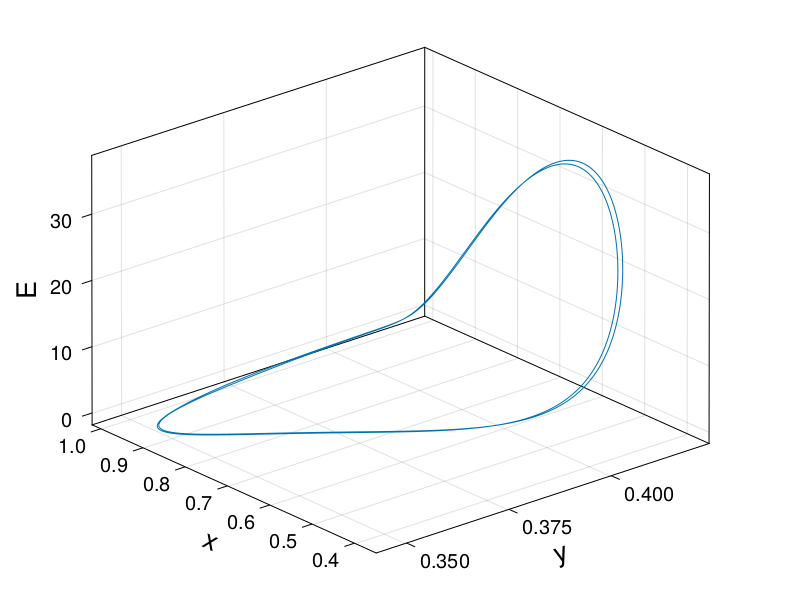

In [40]:
lb_size = 27
tck_size = 20

f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, tr_2p_cycle[:, 3], tr_2p_cycle[:, 2], tr_2p_cycle[:, 1], linewidth = 1.0)
f

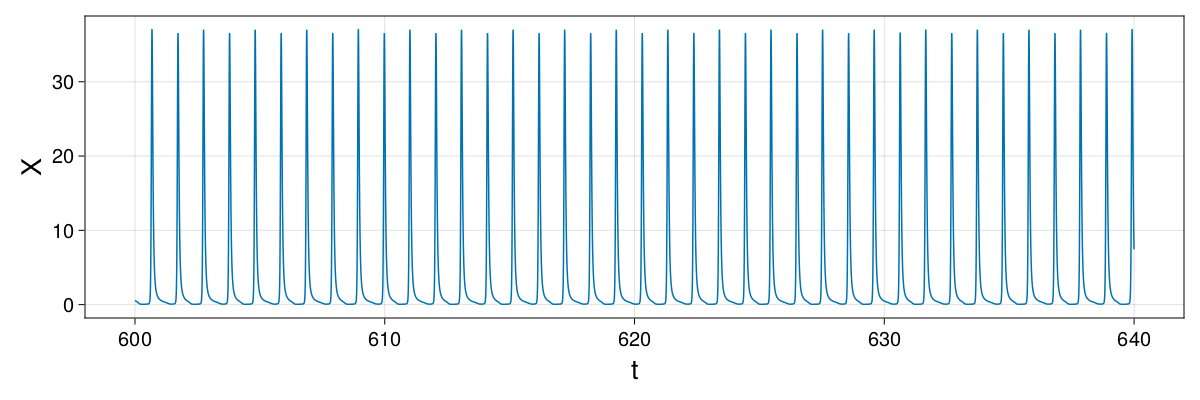

In [41]:
ts, tf = 600000, 640000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)
lines!(axis, trange[ts:tf], tr_2p_cycle[ts:tf, 1])
f

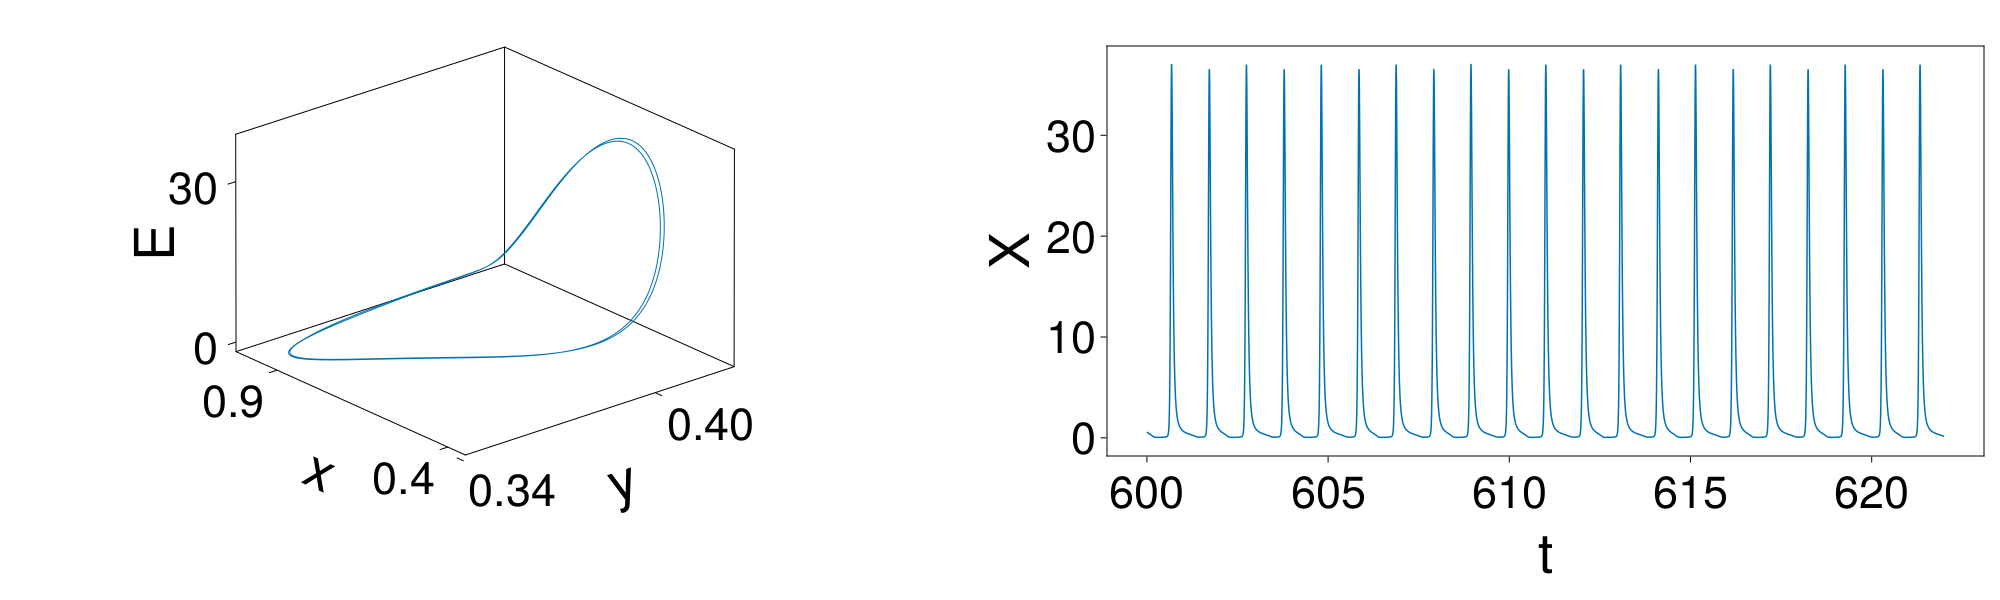

In [67]:
ts, tf = 600000, 622000
ts_p, tf_p = 600000, 622000
lb_size = 55
tck_size = 45
xticks = [0.4, 0.9]
yticks = [0.34, 0.4]
Eticks = [0.0, 30.0]

f = Figure(resolution = (2000, 600))

axis1 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis2 = Axis(f[1, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)

axis1.yticks = xticks
axis1.xticks = yticks
axis1.zticks = Eticks

axis1.xgridvisible = false; axis1.ygridvisible = false; axis1.zgridvisible = false;
axis2.xgridvisible = false; axis2.ygridvisible = false



lines!(axis1, tr_2p_cycle[ts_p:tf_p, 3], tr_2p_cycle[ts_p:tf_p, 2], tr_2p_cycle[ts_p:tf_p, 1], linewidth = 1.0)
lines!(axis2, trange[ts:tf], tr_2p_cycle[ts:tf, 1])

f

In [68]:
save("2-period_cycle.eps", f)

CairoMakie.Screen{EPS}


## limit cycle

In [42]:
u0cycle =  SA[0.49137266204908736, 0.8873895869419873, 0.34651261846778497]
p_cycles = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, -0.09635]
ds_cycle = ContinuousDynamicalSystem(TM, u0cycle, p_cycles)

3-dimensional continuous dynamical system
 state:       [0.491373, 0.88739, 0.346513]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.09, 0.013, 0.15, 1.8, 3.07, …, 0.4, 0.33, 0.4375, -0.09635]

In [43]:
trcycle = trajectory(ds_cycle, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

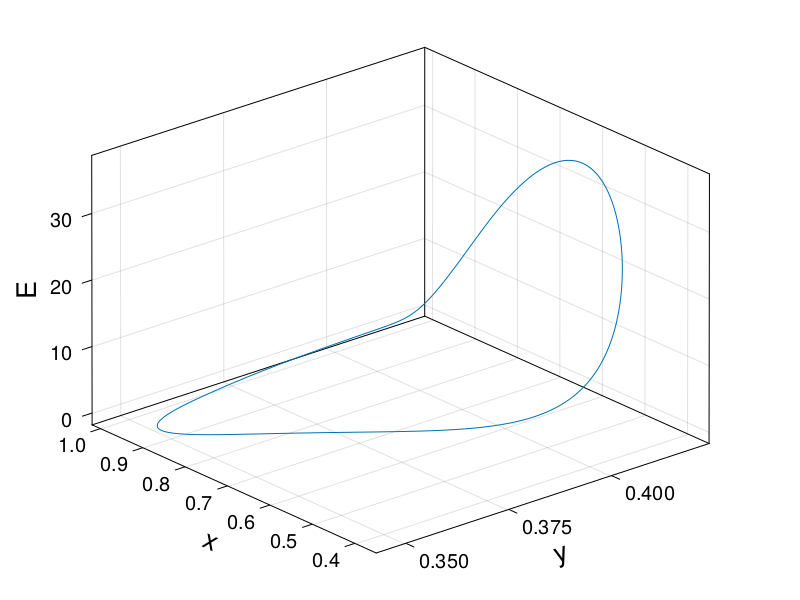

In [44]:
lb_size = 27
tck_size = 20

f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, trcycle[:, 3], trcycle[:, 2], trcycle[:, 1], linewidth = 1.0)
f

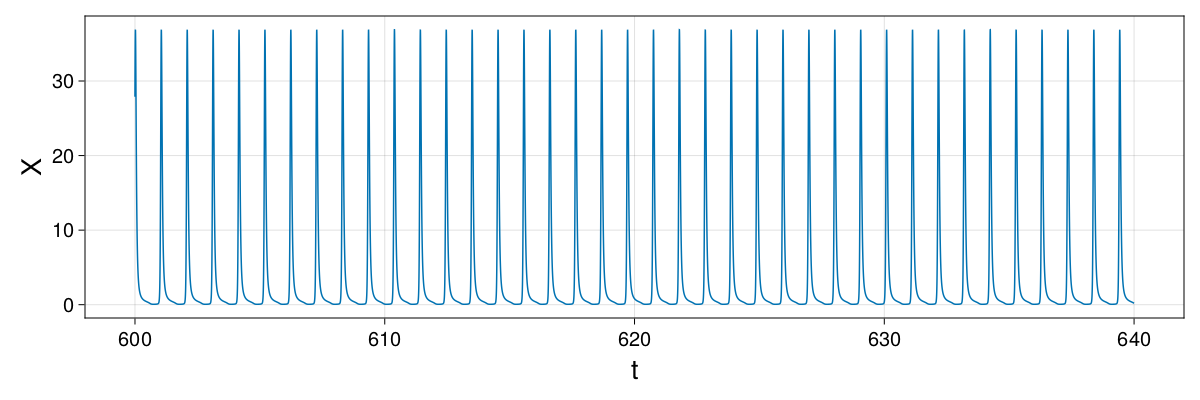

In [45]:
ts, tf = 600000, 640000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)
lines!(axis, trange[ts:tf], trcycle[ts:tf, 1])
f

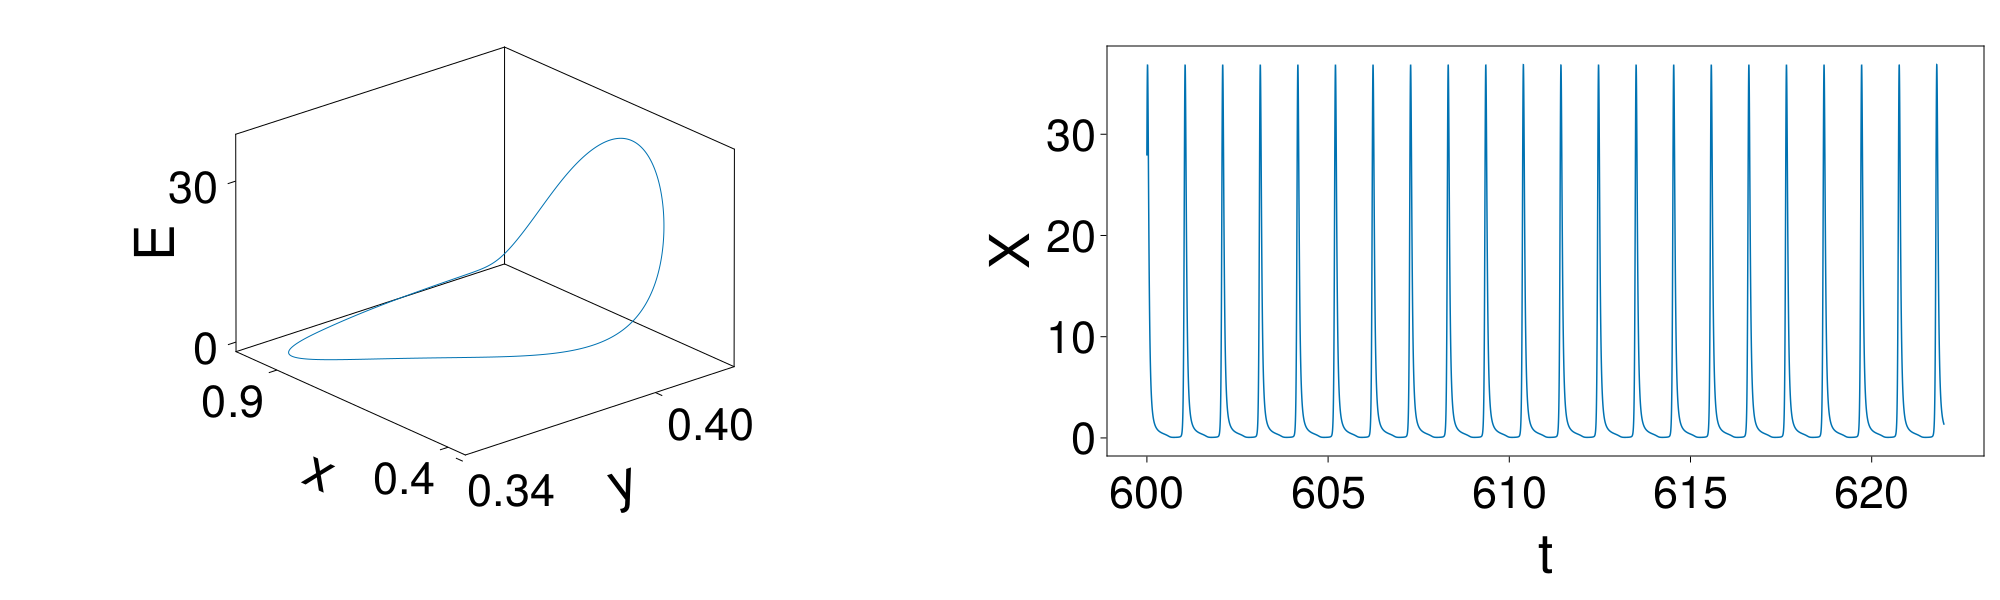

In [69]:
ts, tf = 600000, 622000
ts_p, tf_p = 600000, 622000
lb_size = 55
tck_size = 45
xticks = [0.4, 0.9]
yticks = [0.34, 0.4]
Eticks = [0.0, 30.0]

f = Figure(resolution = (2000, 600))

axis1 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis2 = Axis(f[1, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)

axis1.yticks = xticks
axis1.xticks = yticks
axis1.zticks = Eticks

axis1.xgridvisible = false; axis1.ygridvisible = false; axis1.zgridvisible = false;
axis2.xgridvisible = false; axis2.ygridvisible = false



lines!(axis1, trcycle[ts_p:tf_p, 3], trcycle[ts_p:tf_p, 2], trcycle[ts_p:tf_p, 1], linewidth = 1.0)
lines!(axis2, trange[ts:tf], trcycle[ts:tf, 1])

f

In [70]:
save("1-period_cycle.eps", f)

CairoMakie.Screen{EPS}


## Total image

In [46]:
CairoMakie.activate!()

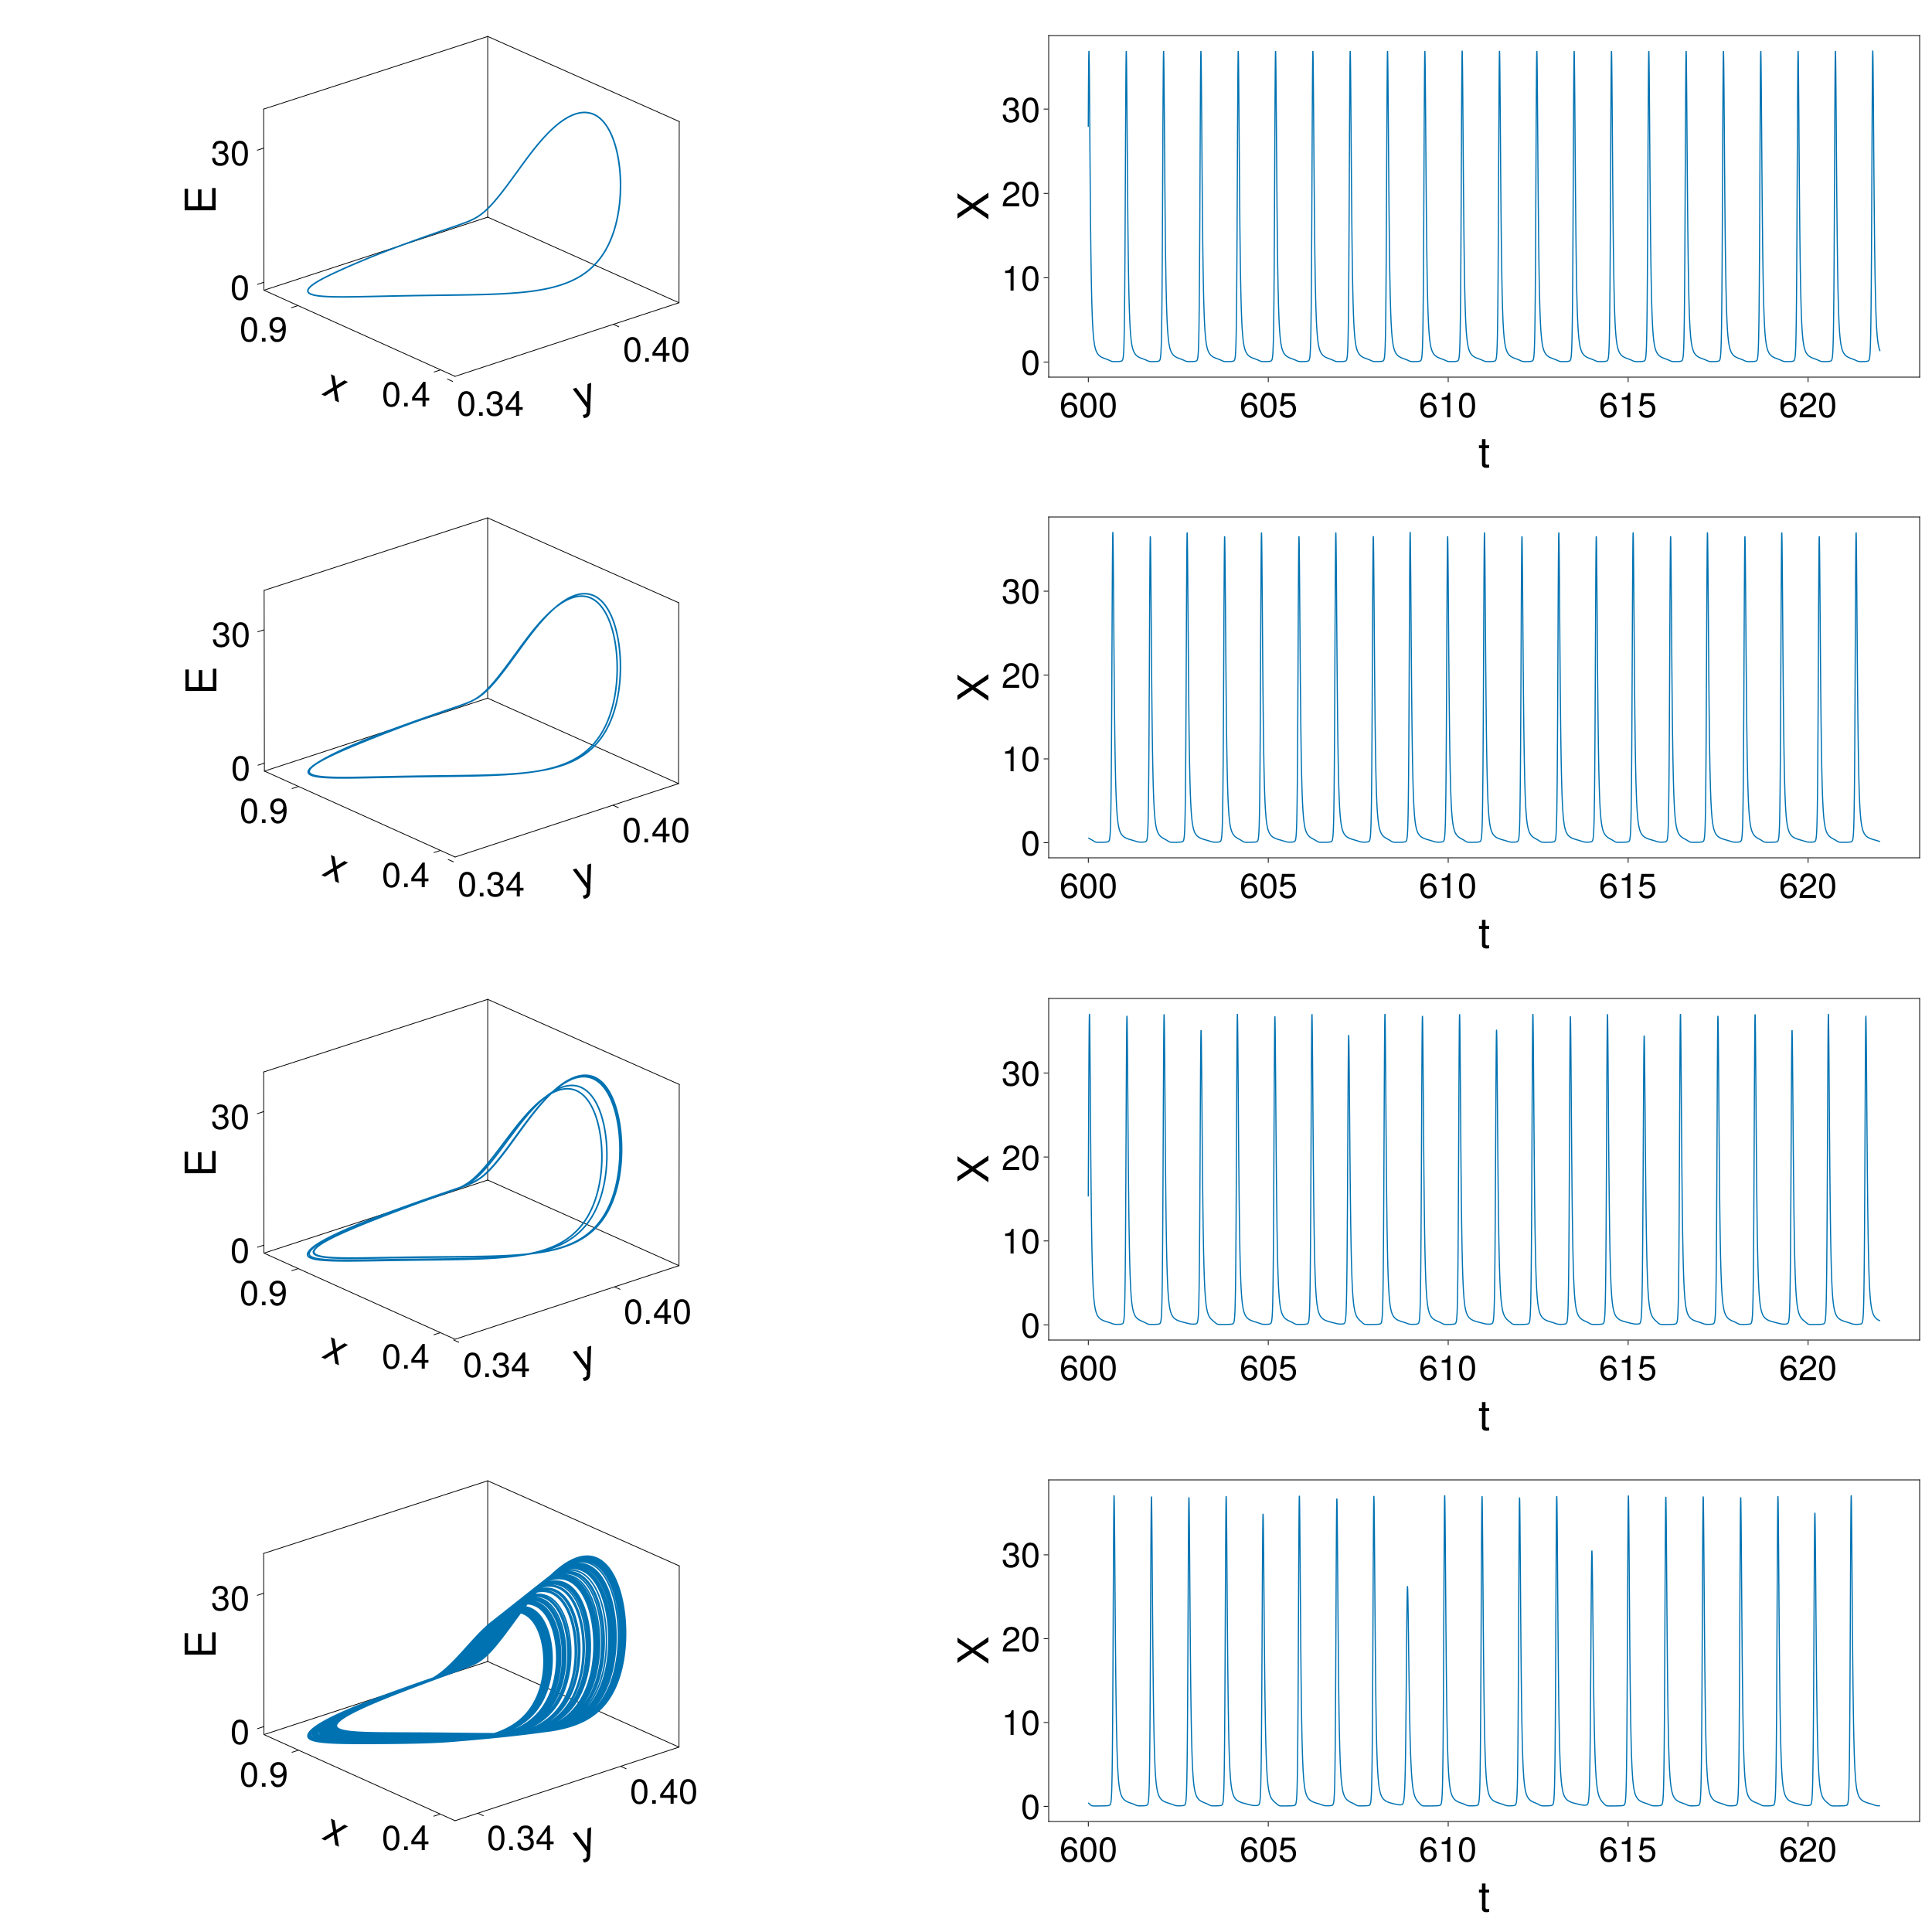

In [259]:
ts, tf = 600000, 622000
ts_p, tf_p = 600000, 650000
lb_size = 55
tck_size = 45
xticks = [0.4, 0.9]
yticks = [0.34, 0.4]
Eticks = [0.0, 30.0]

f = Figure(resolution = (2500, 2500))

axis1 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis2 = Axis(f[1, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)

axis3 = Axis3(f[2, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis4 = Axis(f[2, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)


axis5 = Axis3(f[3, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis6 = Axis(f[3, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)

axis7 = Axis3(f[4, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
axis8 = Axis(f[4, 2], xlabel = "t", ylabel = "X",
              xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size)

axis1.yticks = xticks; axis3.yticks = xticks; axis5.yticks = xticks; axis7.yticks = xticks
axis1.xticks = yticks; axis3.xticks = yticks; axis5.xticks = yticks; axis7.xticks = yticks
axis1.zticks = Eticks; axis3.zticks = Eticks; axis5.zticks = Eticks; axis7.zticks = Eticks

axis1.xgridvisible = false; axis1.ygridvisible = false; axis1.zgridvisible = false;
axis3.xgridvisible = false; axis3.ygridvisible = false; axis3.zgridvisible = false;
axis5.xgridvisible = false; axis5.ygridvisible = false; axis5.zgridvisible = false;
axis7.xgridvisible = false; axis7.ygridvisible = false; axis7.zgridvisible = false;

axis2.xgridvisible = false; axis2.ygridvisible = false; axis4.xgridvisible = false; axis4.ygridvisible = false;
axis6.xgridvisible = false; axis6.ygridvisible = false; axis8.xgridvisible = false; axis8.ygridvisible = false;

lines!(axis1, trcycle[ts_p:tf_p, 3], trcycle[ts_p:tf_p, 2], trcycle[ts_p:tf_p, 1], linewidth = 2.0)
lines!(axis2, trange[ts:tf], trcycle[ts:tf, 1])

lines!(axis3, tr_2p_cycle[ts_p:tf_p, 3], tr_2p_cycle[ts_p:tf_p, 2], tr_2p_cycle[ts_p:tf_p, 1], linewidth = 2.0)
lines!(axis4, trange[ts:tf], tr_2p_cycle[ts:tf, 1])


lines!(axis5, tr_4p_cycle[ts_p:tf_p, 3], tr_4p_cycle[ts_p:tf_p, 2], tr_4p_cycle[ts_p:tf_p, 1], linewidth = 2.0)
lines!(axis6, trange[ts:tf], tr_4p_cycle[ts:tf, 1])

lines!(axis7, tr_chaos[ts_p:1000000, 3], tr_chaos[ts_p:1000000, 2], tr_chaos[ts_p:1000000, 1], linewidth = 2.0)
lines!(axis8, trange[ts:tf], tr_chaos[ts:tf, 1])
f

In [241]:
save("phase_timeseries.eps", f)

CairoMakie.Screen{EPS}


In [221]:
cd("C:\\Users\\HOME\\Desktop")